Problem Statement - You are a cab rental start-up company. You have successfully run the pilot project and now want to launch your cab service across the country You have collected the historical data from your pilot project and now have a requirement to apply analytics for fare prediction. You need to design a system that predicts the fare amount for a cab nde in the city

In [1]:
#importing required Libraries

import os # for input output operation
import pandas as pd  # for input dataframe operation
import numpy as np
import matplotlib.pyplot as plt #for data visualization 
import seaborn as sns # For Data Visualization for interactive image
from collections import Counter
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression #ML algorithm
from sklearn.model_selection import train_test_split #split dataset
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


%matplotlib inline

In [2]:
#setting the working directory

os.chdir("D:\\mlll\\tensorflow\\edu\\Analytics")
print(os.getcwd())

D:\mlll\tensorflow\edu\Analytics


In [3]:
#Loading the data
train  = pd.read_csv("train_cab_fare.csv")
test = pd.read_csv("test_cab_fare.csv")

In [4]:
train

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
...,...,...,...,...,...,...,...
16062,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1.0
16063,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2.0
16064,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1.0
16065,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1.0


In [5]:
test

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1
...,...,...,...,...,...,...
9909,2015-05-10 12:37:51 UTC,-73.968124,40.796997,-73.955643,40.780388,6
9910,2015-01-12 17:05:51 UTC,-73.945511,40.803600,-73.960213,40.776371,6
9911,2015-04-19 20:44:15 UTC,-73.991600,40.726608,-73.789742,40.647011,6
9912,2015-01-31 01:05:19 UTC,-73.985573,40.735432,-73.939178,40.801731,6


## Uderstanding the dataset


In [6]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [7]:
train.tail()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
16062,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1.0
16063,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2.0
16064,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1.0
16065,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1.0
16066,8.5,2011-12-14 06:24:33 UTC,-74.002111,40.729755,-73.983877,40.761975,NaN


In [8]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [9]:
test.tail()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
9909,2015-05-10 12:37:51 UTC,-73.968124,40.796997,-73.955643,40.780388,6
9910,2015-01-12 17:05:51 UTC,-73.945511,40.803600,-73.960213,40.776371,6
9911,2015-04-19 20:44:15 UTC,-73.991600,40.726608,-73.789742,40.647011,6
9912,2015-01-31 01:05:19 UTC,-73.985573,40.735432,-73.939178,40.801731,6
9913,2015-01-18 14:06:23 UTC,-73.988022,40.754070,-74.000282,40.759220,6


In [10]:
#Checking the shape for the train dataset
train.shape  

(16067, 7)

In [11]:
#Checking the shape for the test dataset
test.shape

(9914, 6)

In [12]:
#Checking the datatype for the train dataset
train.dtypes  

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [13]:
#Checking the datatype for the test dataset
test.dtypes

pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [14]:
train.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963642,40.768014,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [15]:
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


## Data Pre-processing

### Data Exploring Missing Value Analysis

In [16]:
 #Convert fare_amount from object to numric
train['fare_amount'] = pd.to_numeric(train['fare_amount'], errors = "coerce")

In [17]:
 train.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [18]:
train.shape

(16067, 7)

In [19]:
train.isnull()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
16062,False,False,False,False,False,False,False
16063,False,False,False,False,False,False,False
16064,False,False,False,False,False,False,False
16065,False,False,False,False,False,False,False


In [20]:
train.isnull().sum()

fare_amount          25
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
dtype: int64

In [21]:
train.isnull().count()

fare_amount          16067
pickup_datetime      16067
pickup_longitude     16067
pickup_latitude      16067
dropoff_longitude    16067
dropoff_latitude     16067
passenger_count      16067
dtype: int64

In [22]:
# Dropping NA values in datatime column 
train.dropna(subset = ['pickup_datetime'])

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
...,...,...,...,...,...,...,...
16062,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1.0
16063,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2.0
16064,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1.0
16065,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1.0


In [23]:
# converting picking pickup_datetime from object to datatime
train["pickup_datetime"] = pd.to_datetime(train['pickup_datetime'], format ='%Y-%m-%d %H:%M:%S UTC', errors= 'coerce')

In [24]:
## We will be seperating the pickup_date time function into year, month, day etc.

train['year'] = train['pickup_datetime'].dt.year
train['month'] = train['pickup_datetime'].dt.month
train['Date'] = train['pickup_datetime'].dt.day
train['Day'] = train['pickup_datetime'].dt.dayofweek
train['Hour'] = train['pickup_datetime'].dt.hour
train['Minute'] = train['pickup_datetime'].dt.minute

In [25]:
# rechecking the datatypes of the variable
train.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
year                        float64
month                       float64
Date                        float64
Day                         float64
Hour                        float64
Minute                      float64
dtype: object

In [26]:
# converting picking pickup_datetime from object to datatime
test["pickup_datetime"] = pd.to_datetime(test['pickup_datetime'], format ='%Y-%m-%d %H:%M:%S UTC', errors= 'coerce')

In [27]:
## We will be seperating the pickup_date time function into year, month, day etc.

test['year'] = test['pickup_datetime'].dt.year
test['month'] = test['pickup_datetime'].dt.month
test['Date'] = test['pickup_datetime'].dt.day
test['Day'] = test['pickup_datetime'].dt.dayofweek
test['Hour'] = test['pickup_datetime'].dt.hour
test['Minute'] = test['pickup_datetime'].dt.minute

In [28]:
# rechecking the datatypes of the variable
test.dtypes

pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
year                          int32
month                         int32
Date                          int32
Day                           int32
Hour                          int32
Minute                        int32
dtype: object

##### Missing Value Analysis

In [29]:
train = train.drop(train[train['pickup_datetime'].isnull()].index, axis= 0)
print(train.shape)
print(train['pickup_datetime'].isnull().sum())

(16066, 13)
0


In [30]:
train['passenger_count'].describe()

count    16011.000000
mean         2.625171
std         60.846021
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       5345.000000
Name: passenger_count, dtype: float64

THe passenger count of 5345 is not possible because the number of maximum passengers that can be in SUV is 6.

In [31]:
train = train.drop(train[train['passenger_count']> 6].index, axis= 0)

In [32]:
train = train.drop(train[train['passenger_count'] == 0].index, axis= 0)

In [33]:
train['passenger_count'].describe()

count    15934.000000
mean         1.649581
std          1.265943
min          0.120000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

In [34]:
train['passenger_count'].sort_values(ascending=True)

8862     0.12
16048    1.00
22       1.00
21       1.00
20       1.00
         ... 
8076      NaN
8139      NaN
8259      NaN
8306      NaN
16066     NaN
Name: passenger_count, Length: 15989, dtype: float64

In [35]:
# Remove missing values rows for passenger_count
train = train.drop(train[train['passenger_count'].isnull()].index, axis= 0)
print(train.shape)
print(train['passenger_count'].isnull().sum())

(15934, 13)
0


There is one value of 0.12 present in the passenger_conut which is not possible we will be removing it also


In [36]:
train = train.drop(train[train['passenger_count'] == 0.12].index ,axis = 0)
train.shape

(15933, 13)

In [37]:
# sort the fare_amount into descendingorder to find if there are any outliers or not
train['fare_amount'].sort_values(ascending=False)

1015    54343.0
1072     4343.0
607       453.0
980       434.0
1335      180.0
         ...   
1712        NaN
2412        NaN
2458        NaN
8178        NaN
8226        NaN
Name: fare_amount, Length: 15933, dtype: float64

In [38]:
#Count the number of rows where g=fare amount is less than 0
Counter(train['fare_amount']<0)

Counter({False: 15930, True: 3})

In [39]:
# remove the negative values in the fare_amount  column
train = train.drop(train[train['fare_amount'] < 0].index, axis= 0)
print(train.shape)


(15930, 13)


In [40]:
# removing all the value of fare amount which are closer to 0
train = train.drop(train[train['fare_amount'] < 1].index, axis= 0)
print(train.shape)


(15928, 13)


In [41]:
# removing all the value of fare amount which are closer to 0
train["fare_amount"].min()

np.float64(1.14)

In [42]:
# removing the outliers in the fare_amount especially the top 3 values have a huge difference
train = train.drop(train[train['fare_amount'] > 454].index, axis= 0)
train.shape

(15926, 13)

In [43]:
# Remove missing values rows for fare_amount
train = train.drop(train[train['fare_amount'].isnull()].index, axis= 0)
print(train.shape)
print(train['fare_amount'].isnull().sum())

(15902, 13)
0


In [44]:
train['fare_amount'].sort_values(ascending=False)

607     453.00
980     434.00
1335    180.00
1483    165.00
6630    128.83
         ...  
4367      2.50
6297      2.50
3558      2.50
6226      2.50
1427      1.14
Name: fare_amount, Length: 15902, dtype: float64

In [45]:
train['fare_amount'].describe()

count    15902.000000
mean        11.376356
std         10.814908
min          1.140000
25%          6.000000
50%          8.500000
75%         12.500000
max        453.000000
Name: fare_amount, dtype: float64

In [46]:
# latitude can from -90 to 90
# Longtitude can be from -180 to 180

# we need to drop all the latitude values less than -90
train[train['pickup_latitude'] < -90 ]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,Date,Day,Hour,Minute


In [47]:
# check the latitude value greater than 90
train[train['pickup_latitude'] > 90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,Date,Day,Hour,Minute
5686,3.3,2011-07-30 11:15:00,-73.947235,401.083332,-73.951392,40.778927,1.0,2011.0,7.0,30.0,5.0,11.0,15.0


In [48]:
# removing the out of the range values latitude
train = train.drop(train[train['pickup_latitude']< -90].index, axis= 0)
train = train.drop(train[train['pickup_latitude'] > 90].index, axis= 0)
print(train.shape)

(15901, 13)


In [49]:
# Checking the Pickup_Longtitude range for less than -180
train[train['pickup_longitude'] < -180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,Date,Day,Hour,Minute


In [50]:
# Checking the Pickup_Longtitude range for more than 180
train[train['pickup_longitude'] > 180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,Date,Day,Hour,Minute


In [51]:
# checking now for dropoff latitude and longtitude
train[train['dropoff_latitude'] < -90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,Date,Day,Hour,Minute


In [52]:
train[train['dropoff_latitude'] > 90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,Date,Day,Hour,Minute


In [53]:
# Checking for dropoff Longitude
train[train['dropoff_longitude'] < -180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,Date,Day,Hour,Minute


In [54]:
train[train['dropoff_longitude'] > 180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,Date,Day,Hour,Minute


In [55]:
train.shape

(15901, 13)

In [56]:
train.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

In [57]:
test.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

Data-Preprocessing and cleaning done Calculating the haversine distance now

In [58]:
# we have given pickup latitude and Longitude and dropof latitude and longtitude3s
# so we need to calculate the distance using the haversine and we will create a new variable called distance

from math import radians, cos, sin, asin,sqrt

def haversine(a):
    lon1 = a.iloc[0]
    lat1 = a.iloc[1]
    lon2 = a.iloc[2]
    lat2 = a.iloc[3]

    '''"Calculate the great distnace two points on the earth" (specified in decimal degree)"'''

    #convert decimal to radians
    lon1, lat1,lon2, lat2 = map(radians,[lon1, lat1,lon2, lat2])
    
    #haersine formula
    dlon = lon2 -lon1
    dlat = lat2 -lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2*asin(sqrt(a))
    #Radius of earth in kilometer is 6371

    km = 6371 * c
    return km
    
    

In [59]:
train['distance'] = train[['pickup_longitude','pickup_latitude','dropoff_longitude', 'dropoff_latitude']].apply(haversine, axis = 1)

In [60]:
test['distance'] = test[['pickup_longitude','pickup_latitude','dropoff_longitude', 'dropoff_latitude']].apply(haversine, axis = 1)

In [61]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0,1.999157


In [62]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,Date,Day,Hour,Minute,distance
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8,2.323259
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8,2.425353
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53,0.618628
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12,1.961033
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12,5.387301


In [63]:
train.nunique()

fare_amount            459
pickup_datetime      15856
pickup_longitude     13672
pickup_latitude      14110
dropoff_longitude    13763
dropoff_latitude     14136
passenger_count          7
year                     7
month                   12
Date                    31
Day                      7
Hour                    24
Minute                  60
distance             15448
dtype: int64

In [64]:
test.nunique()

pickup_datetime      1753
pickup_longitude     9124
pickup_latitude      9246
dropoff_longitude    9141
dropoff_latitude     9360
passenger_count         6
year                    7
month                  12
Date                   31
Day                     7
Hour                   24
Minute                 60
distance             9830
dtype: int64

In [65]:
# checking outlier in the distance column
train['distance'].sort_values(ascending= False)


9147     8667.542104
8647     8667.497512
2397     8667.454421
472      8667.304968
11653    8666.701504
            ...     
4954        0.000000
8629        0.000000
8645        0.000000
11218       0.000000
14485       0.000000
Name: distance, Length: 15901, dtype: float64

In [66]:
# train[train['distance'] > 8000] 

The top 23 values in distance cloumn is very high. It can't be than 8000 because its the maxmimum distance of earth. If we remove this top 23 values the top distance goes down to 127.

In [67]:
train = train.drop(train[train['distance'] > 130].index, axis= 0)
train.shape

(15878, 14)

In [68]:
Counter(train['distance'] == 0)

Counter({False: 15424, True: 454})

In [69]:
Counter(test['distance'] == 0)

Counter({False: 9829, True: 85})

In [70]:
# we need to drop all the distance values which are equal to 0.
train = train.drop(train[train['distance'] == 0].index , axis=0)
train.shape

(15424, 14)

In [71]:
# we need to drop all the distance values which are equal to 0.
test = test.drop(test[test['distance'] == 0].index , axis=0)
test.shape

(9829, 13)

We have splitted the pickup_date time into year , month, day, hour and minute so pickup_date time would be irrelevant so we will be dropping it. We have already calculated distance using the pickup and dropoff latitude and longitude so we will be dropping all those variables.

In [72]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0,1.999157


In [73]:
drop_column = ['pickup_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','Minute']
train = train.drop(drop_column, axis= 1)

In [74]:
train.head()

,fare_amount,passenger_count,year,month,Date,Day,Hour,distance
0,4.5,1.0,2009.0,6.0,15.0,0.0,17.0,1.030764
1,16.9,1.0,2010.0,1.0,5.0,1.0,16.0,8.450134
2,5.7,2.0,2011.0,8.0,18.0,3.0,0.0,1.389525
3,7.7,1.0,2012.0,4.0,21.0,5.0,4.0,2.799270
4,5.3,1.0,2010.0,3.0,9.0,1.0,7.0,1.999157


In [75]:
train.dtypes

fare_amount        float64
passenger_count    float64
year               float64
month              float64
Date               float64
Day                float64
Hour               float64
distance           float64
dtype: object

In [76]:
test.dtypes

pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
year                          int32
month                         int32
Date                          int32
Day                           int32
Hour                          int32
Minute                        int32
distance                    float64
dtype: object

In [77]:
drop_column = ['pickup_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','Minute']
test = test.drop(drop_column, axis= 1)

In [78]:
test.head()

,passenger_count,year,month,Date,Day,Hour,distance
0,1,2015,1,27,1,13,2.323259
1,1,2015,1,27,1,13,2.425353
2,1,2011,10,8,5,11,0.618628
3,1,2012,12,1,5,21,1.961033
4,1,2012,12,1,5,21,5.387301


In [79]:
test.dtypes

passenger_count      int64
year                 int32
month                int32
Date                 int32
Day                  int32
Hour                 int32
distance           float64
dtype: object

In [80]:
#Converting variavle of float datatype to int datatype

train['passenger_count'] = train['passenger_count'].astype('int64')
train['year'] = train['year'].astype('int64')
train['month'] = train['month'].astype('int64')
train['Date'] = train['Date'].astype('int64')
train['Day'] = train['Day'].astype('int64')
train['Hour'] = train['Hour'].astype('int64')


In [81]:
train.dtypes

fare_amount        float64
passenger_count      int64
year                 int64
month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

In [82]:
train.head()

,fare_amount,passenger_count,year,month,Date,Day,Hour,distance
0,4.5,1,2009,6,15,0,17,1.030764
1,16.9,1,2010,1,5,1,16,8.450134
2,5.7,2,2011,8,18,3,0,1.389525
3,7.7,1,2012,4,21,5,4,2.799270
4,5.3,1,2010,3,9,1,7,1.999157


### Data Visualization

Visualization of Following:-


1. Number of Passenger effects the fare
2. Pickup date and time effects the fare
3. Day of the week does effects the fare
4. Distance effects the fare

<Axes: xlabel='passenger_count', ylabel='count'>

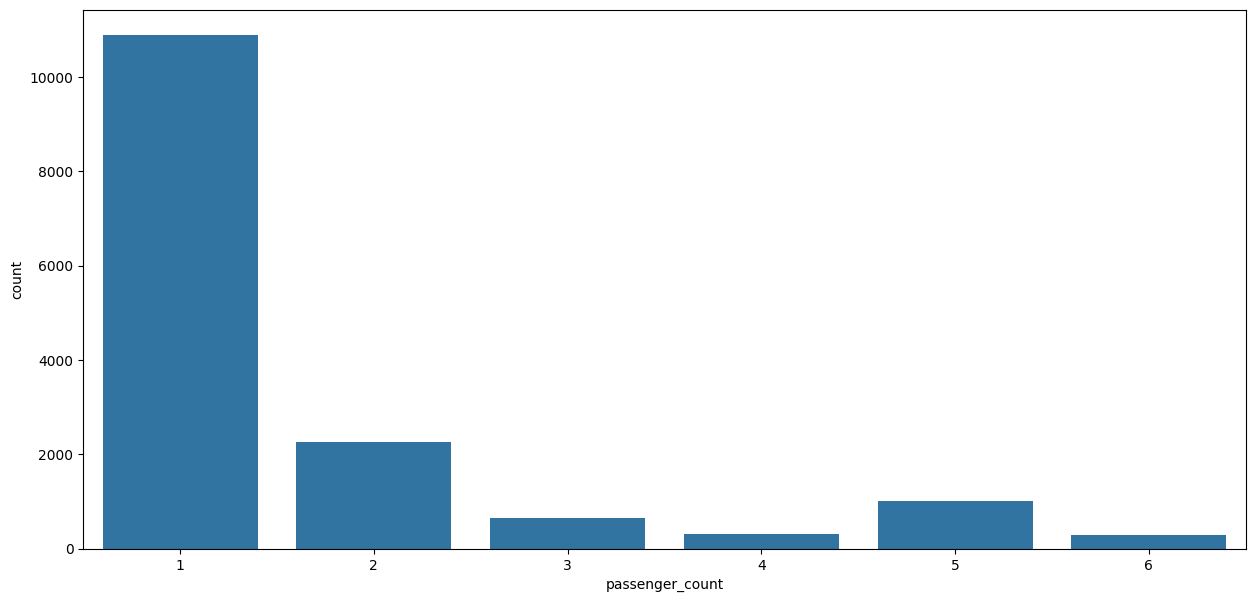

In [83]:
# Counting the number of passenger vs number of rides
plt.figure(figsize=(15,7))
sns.countplot(x = "passenger_count", data= train)

Signle and double travelling passengers are the frequent  rides taken 

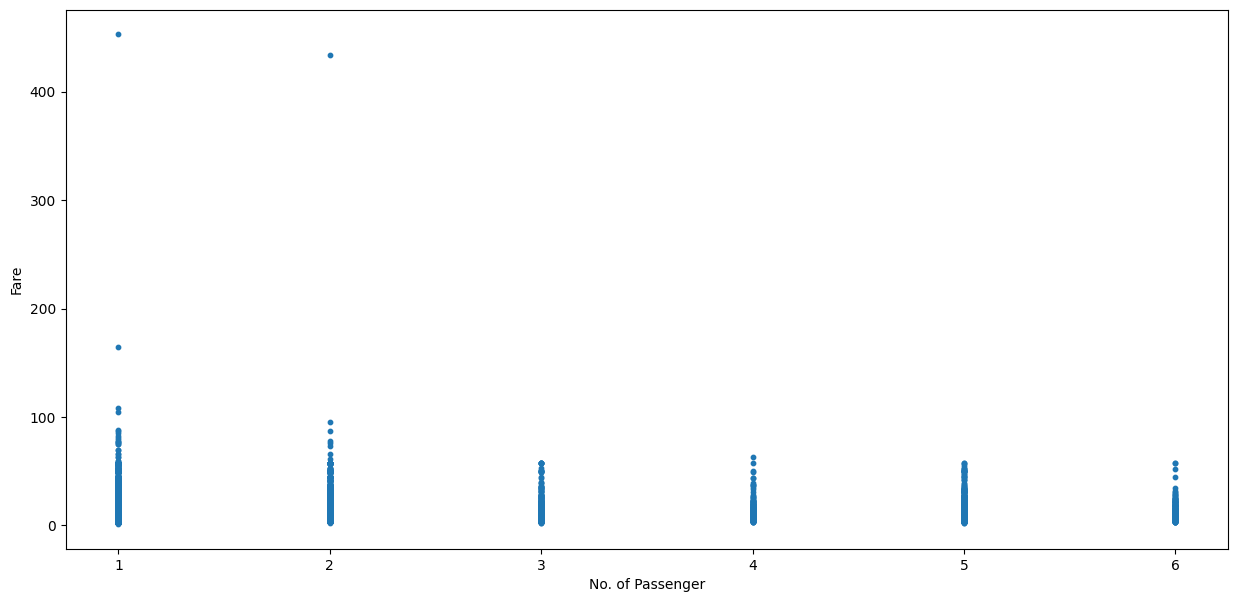

In [84]:
# Relationship between number of passenger and fare

plt.figure(figsize=(15,7))
plt.scatter(x = train['passenger_count'], y= train['fare_amount'], s = 10)
plt.xlabel('No. of Passenger')
plt.ylabel('Fare')
plt.show()

Signle and double passenger rides had the maximum fare

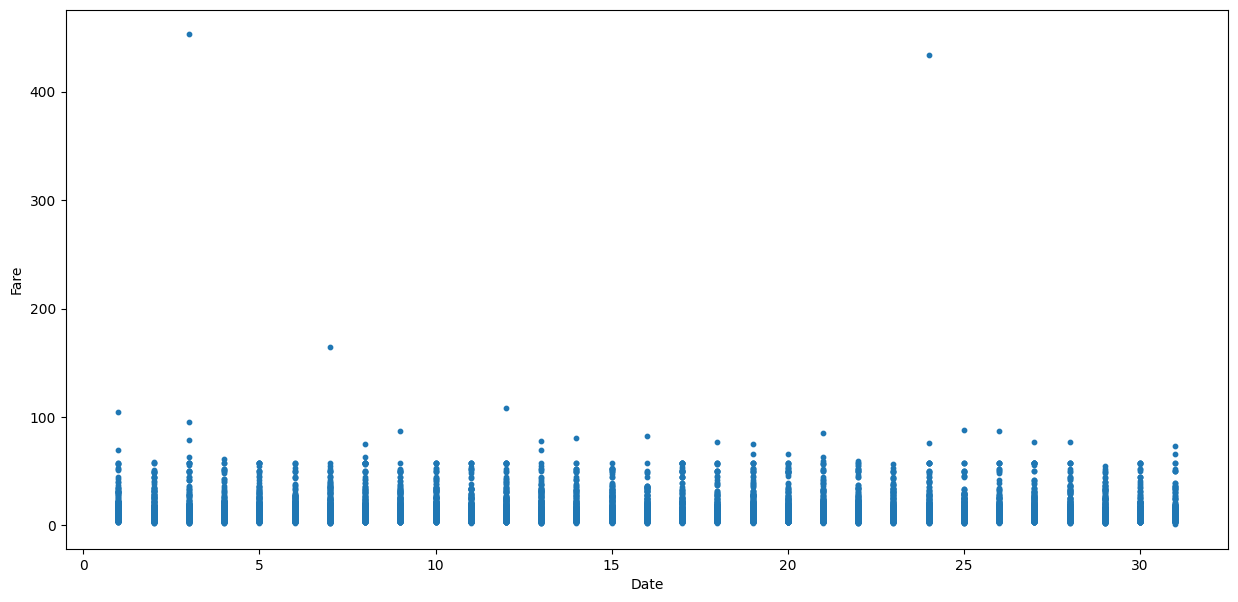

In [85]:
# Relationship between date and fare

plt.figure(figsize=(15,7))
plt.scatter(x = train['Date'], y= train['fare_amount'], s = 10)
plt.xlabel('Date')
plt.ylabel('Fare')
plt.show()

Fare is almost equal on all days of the month


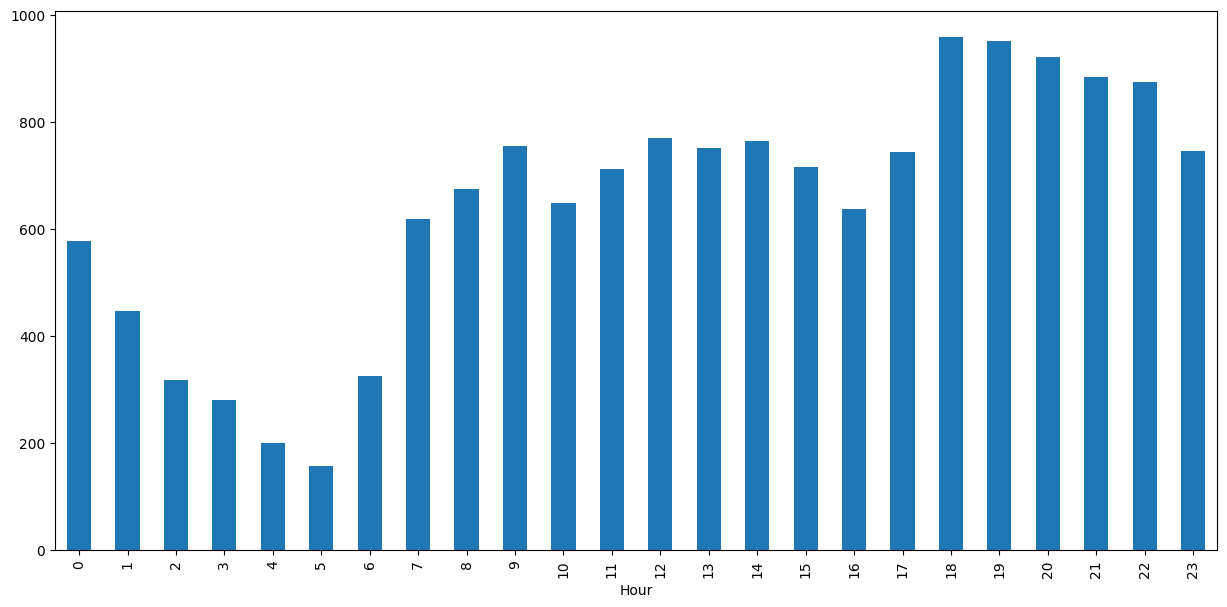

In [86]:
# Relationship between the hour of the day and fare

plt.figure(figsize=(15,7))
train.groupby(train['Hour'])['Hour'].count().plot(kind = 'bar')
plt.show()

Lowest number of cabs at around 5AM and highest number of cabs between 6 pm to 7 pm

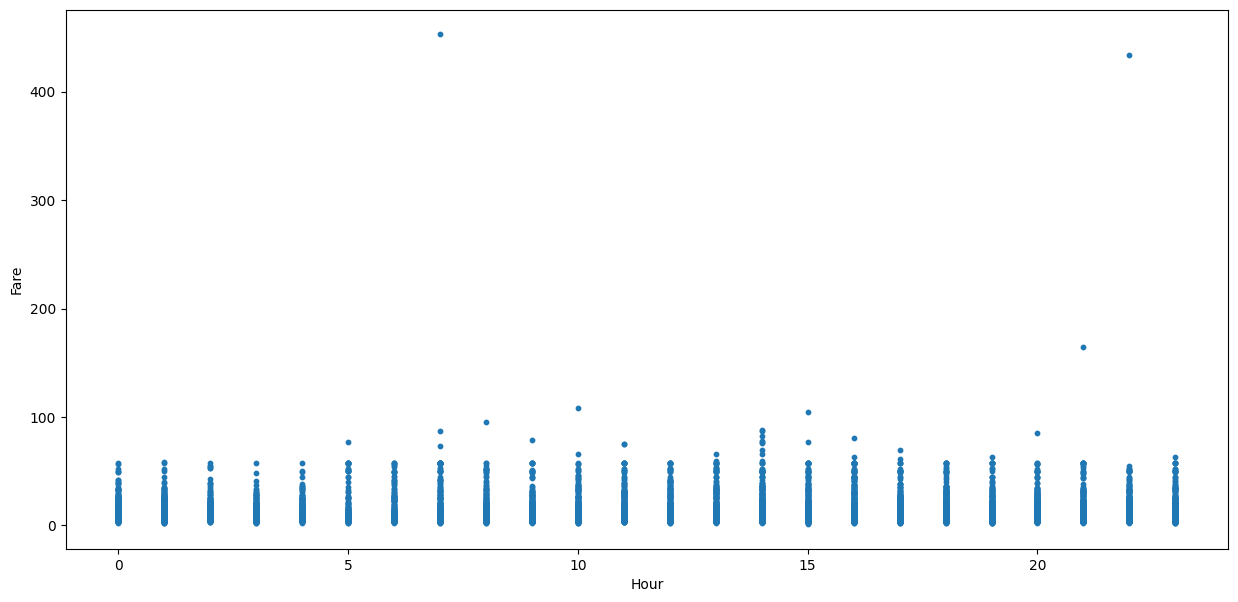

In [87]:
# Relationship between time of day and fare

plt.figure(figsize=(15,7))
plt.scatter(x = train['Hour'], y= train['fare_amount'], s = 10)
plt.xlabel('Hour')
plt.ylabel('Fare')
plt.show()

Fare is highest at 7AM and around 11 PM which tells the fare is highest  in early mornings and in late nights.

<Axes: xlabel='Day', ylabel='count'>

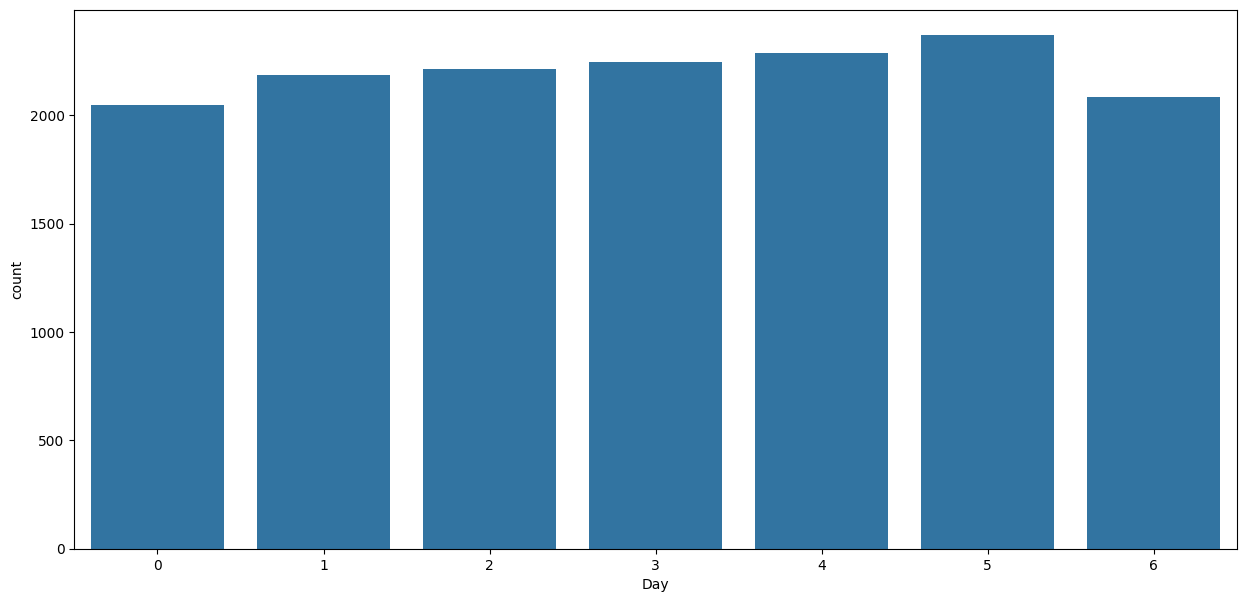

In [88]:
# impact of Day on the number of cab rides
plt.figure(figsize=(15,7))
sns.countplot(x = 'Day', data= train )

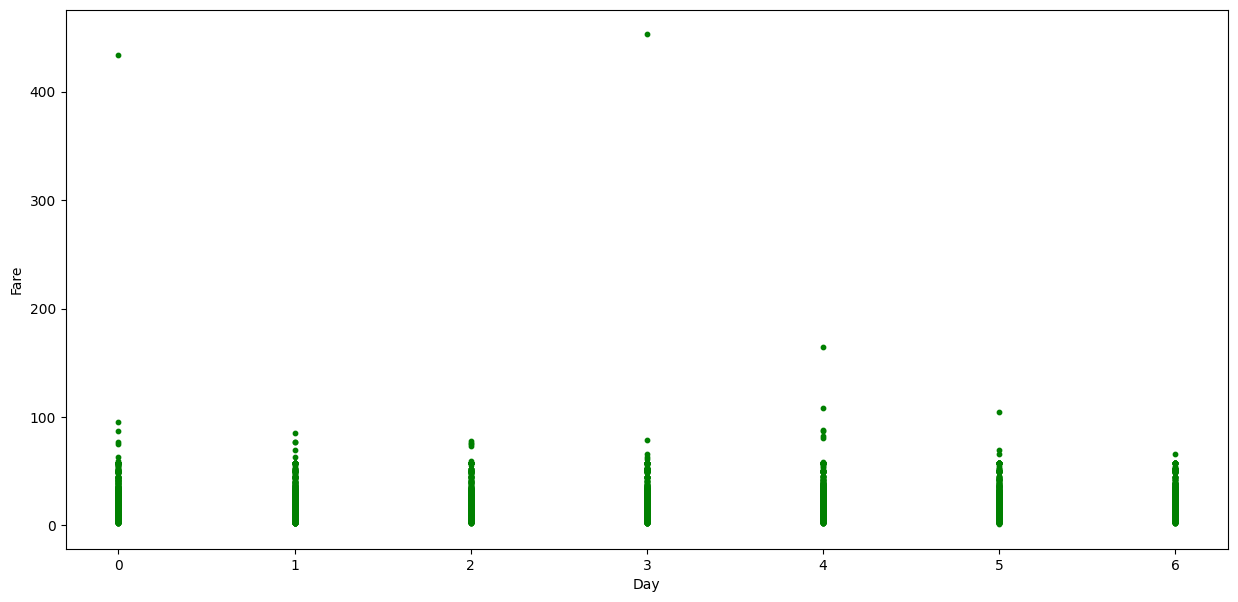

In [89]:
# Relationship between day of the week and fare

plt.figure(figsize=(15,7))
plt.scatter(x = train['Day'], y= train['fare_amount'], s = 10, c= 'g')
plt.xlabel('Day')
plt.ylabel('Fare')
plt.show()

The Cab fare highest on Sunday , Monday and Thursday. while at was lowest on Webnesday and Saturday. Because the demand of cab rides were lowest on saturday.

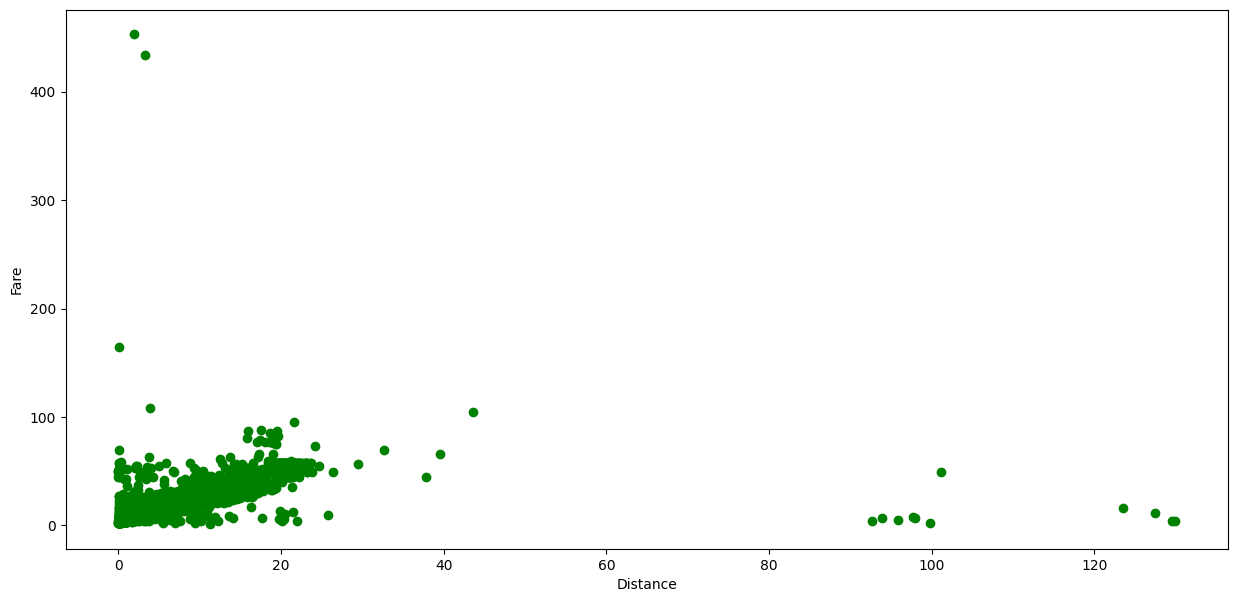

In [90]:
# Relationship between Distance and fare

plt.figure(figsize=(15,7))
plt.scatter(x = train['distance'], y= train['fare_amount'], c = 'g')
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.show()

Distance is showing directly proportinal to charged as the distance is increasing the fare charge is also increasing.

### Feature Scaling

fare_amount


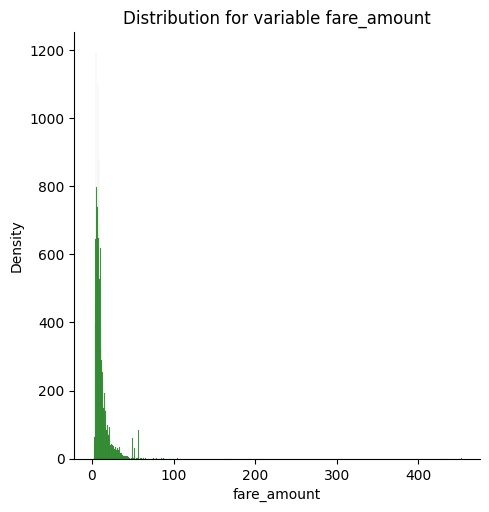

distance


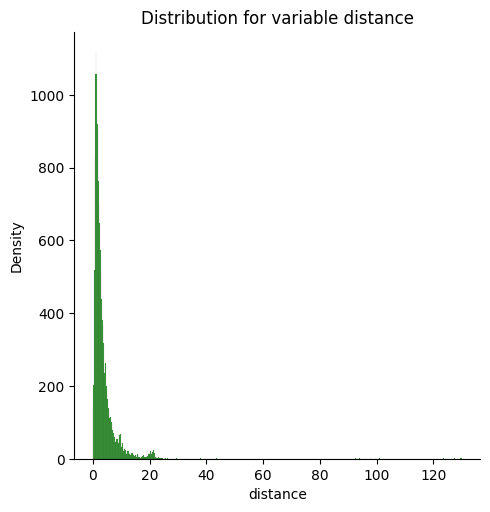

In [91]:
# Normality check for the training data cab fare and distance
for i in ['fare_amount','distance']:
    print(i)    
    sns.displot(train[i], bins = 'auto', color = 'green')
    plt.title("Distribution for variable " + i)
    plt.ylabel("Density")
    plt.show()
    

In [92]:
# since the fareamount is highly skewed applying log transformation
train['fare_amount'] = np.log1p(train['fare_amount'])


In [93]:
# since the variable distance is highly skewed applying log tranformation
train['distance'] = np.log1p(train['distance'])

fare_amount


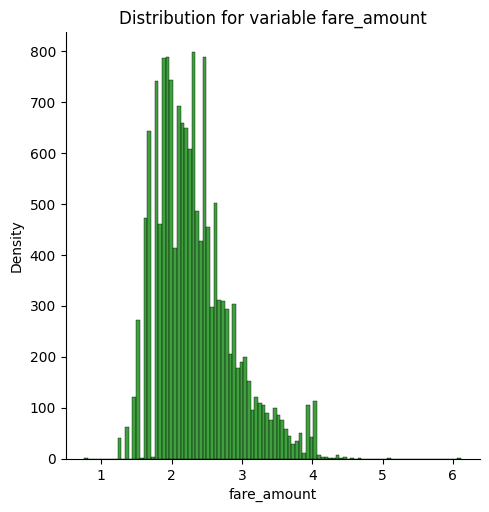

distance


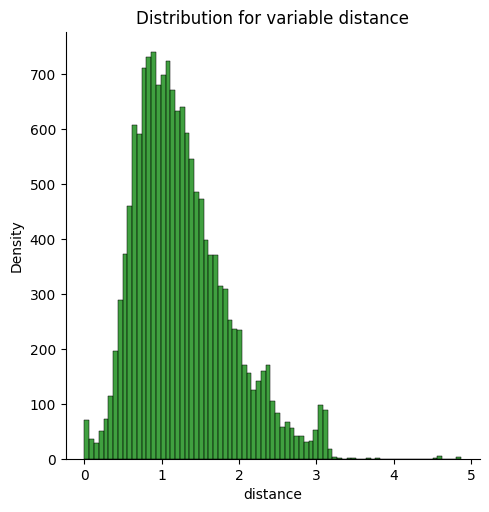

In [94]:
# Normality check for the training data cab fare and distance
for i in ['fare_amount','distance']:
    print(i)    
    sns.displot(train[i], bins = 'auto', color = 'green')
    plt.title("Distribution for variable " + i)
    plt.ylabel("Density")
    plt.show()
     

In [95]:
test


,passenger_count,year,month,Date,Day,Hour,distance
0,1,2015,1,27,1,13,2.323259
1,1,2015,1,27,1,13,2.425353
2,1,2011,10,8,5,11,0.618628
3,1,2012,12,1,5,21,1.961033
4,1,2012,12,1,5,21,5.387301
...,...,...,...,...,...,...,...
9909,6,2015,5,10,6,12,2.124874
9910,6,2015,1,12,0,17,3.270969
9911,6,2015,4,19,6,20,19.183942
9912,6,2015,1,31,5,1,8.343486


distance


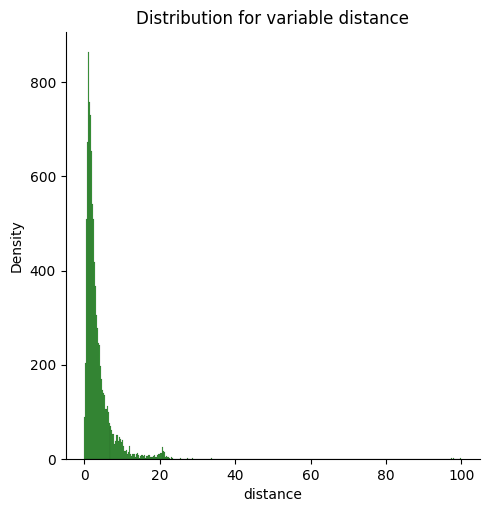

In [96]:
# Normality check for the test data cab fare and distance
for i in ['distance']:
    print(i)    
    sns.displot(test[i], bins = 'auto', color = 'green')
    plt.title("Distribution for variable " + i)
    plt.ylabel("Density")
    plt.show()
     

In [97]:
# since the variable distance is highly skewed applying log tranformation
test['distance'] = np.log1p(test['distance'])

distance


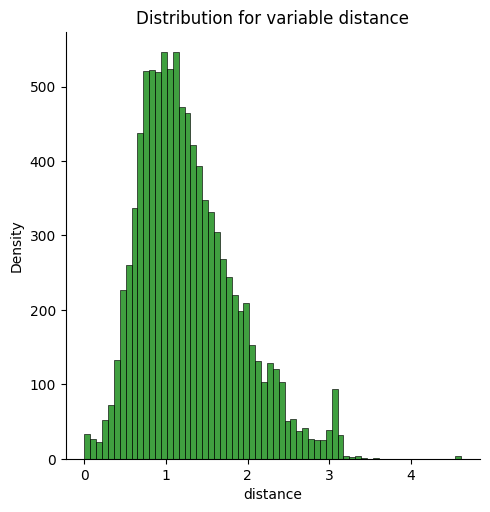

In [98]:
# Normality check for the test data cab fare and distance
for i in ['distance']:
    print(i)    
    sns.displot(test[i], bins = 'auto', color = 'green')
    plt.title("Distribution for variable " + i)
    plt.ylabel("Density")
    plt.show()
     

After applying log transformation the skewed data has already convert into normal distribute so there is no need for standaredization and normalization. We have got the bell cure.

## Data Modelling  - Applying ML Alogorithms 

In [99]:
# Applying train test split on the dataset

x_train, x_test, y_train, y_test = train_test_split(train.iloc[:,train.columns != 'fare_amount', ],train.iloc[:,0], test_size= 0.20 ,random_state= 1)

In [100]:
x_train

,passenger_count,year,month,Date,Day,Hour,distance
7690,2,2012,5,16,2,6,1.691253
13018,1,2014,7,11,4,10,0.828231
12950,3,2009,6,27,5,17,0.980620
14009,1,2009,6,12,4,15,0.534072
2816,5,2013,5,18,5,20,1.141300
...,...,...,...,...,...,...,...
994,1,2009,3,24,1,11,1.465260
5454,1,2014,1,11,5,18,0.666875
12682,6,2014,1,7,1,9,1.437090
259,1,2013,5,2,3,3,0.803939


In [101]:
y_train
y_train.shape

(12339,)

In [102]:
print(x_train.shape)
print(x_test.shape)

(12339, 7)
(3085, 7)


In [103]:
print(y_train.shape)
print(y_test.shape) 

(12339,)
(3085,)


#### Linear Regression

In [104]:
# Buliding Model on top of tranning dataset
fit_LR = LinearRegression().fit(x_train, y_train)


In [105]:
# Prediction on train data
pred_train_LR = fit_LR.predict(x_train)

In [106]:
# Prediction on test data
pred_test_LR = fit_LR.predict(x_test)

In [107]:
# Calculate RMSE for test data
RMSE_test_LR = np.sqrt(mean_squared_error(y_test, pred_test_LR))

#claculate RMSE for train data
RMSE_train_LR = np.sqrt(mean_squared_error(y_train, pred_train_LR))

In [108]:
print("The Root Mean Squared Error for Train data = " +str(RMSE_train_LR))
print("The Root Mean Squared Error for Test data = " +str(RMSE_test_LR))

The Root Mean Squared Error for Train data = 0.2753110017967314
The Root Mean Squared Error for Test data = 0.24540661786977747


In [109]:
#calculate R^2 for train data
r2_score(y_train,pred_train_LR)

0.7495502651880404

In [110]:
#calculate R^2 for test data
r2_score(y_test,pred_test_LR)

0.7827019104296598

### Decision Tree Model

In [111]:
# Fitting the model on the train data
fit_DT = DecisionTreeRegressor(max_depth=2).fit(x_train,y_train)

In [112]:
# Prediction on train data
pred_train_DT = fit_DT.predict(x_train)

In [113]:
# Prediction on test data
pred_test_DT = fit_DT.predict(x_test)

In [114]:
# Calculate RMSE for test data
RMSE_test_DT = np.sqrt(mean_squared_error(y_test, pred_test_DT))

#claculate RMSE for train data
RMSE_train_DT = np.sqrt(mean_squared_error(y_train, pred_train_DT))

In [115]:
print("The Root Mean Squared Error for Train data = " +str(RMSE_train_DT))
print("The Root Mean Squared Error for Test data = " +str(RMSE_test_DT))

The Root Mean Squared Error for Train data = 0.29962109020770195
The Root Mean Squared Error for Test data = 0.28674606171586176


In [116]:
#calculate R^2 for train data
r2_score(y_train,pred_train_DT)

0.7033678616157002

In [117]:
#calculate R^2 for test data
r2_score(y_test,pred_test_DT)

0.7033268167661033

### Random Forest Model

In [118]:
# Fitting the model on the train data
fit_RF = RandomForestRegressor(n_estimators= 200).fit(x_train,y_train)

In [119]:
# Prediction on train data
pred_train_RF = fit_RF.predict(x_train)


In [120]:
# Prediction on test data
pred_test_RF = fit_RF.predict(x_test)

In [121]:
# Calculate RMSE for test data
RMSE_test_RF = np.sqrt(mean_squared_error(y_test, pred_test_RF))

# Calculate RMSE for train data
RMSE_train_RF = np.sqrt(mean_squared_error(y_train, pred_train_RF))

In [122]:
print("The Root Mean Squared Error for Train data = " +str(RMSE_train_RF))
print("The Root Mean Squared Error for Test data = " +str(RMSE_test_RF))

The Root Mean Squared Error for Train data = 0.09584553537414978
The Root Mean Squared Error for Test data = 0.23492811021776275


In [123]:
#calculate R^2 for train data
r2_score(y_train,pred_train_RF)

0.9696459099681322

In [124]:
#calculate R^2 for test data
r2_score(y_test,pred_test_RF)

0.8008623681286469

### Gradient Boosting

In [125]:
# Fitting the model on the train data
fit_GB = GradientBoostingRegressor().fit(x_train,y_train)

In [126]:
# Prediction on train data
pred_train_GB = fit_GB.predict(x_train)


In [127]:
# Prediction on test data
pred_test_GB = fit_GB.predict(x_test)


In [128]:
# Calculate RMSE for test data
RMSE_test_GB = np.sqrt(mean_squared_error(y_test, pred_test_GB))

# Calculate RMSE for train data
RMSE_train_GB = np.sqrt(mean_squared_error(y_train, pred_train_GB))

In [129]:
print("The Root Mean Squared Error for Train data = " +str(RMSE_train_RF))
print("The Root Mean Squared Error for Test data = " +str(RMSE_test_RF))

The Root Mean Squared Error for Train data = 0.09584553537414978
The Root Mean Squared Error for Test data = 0.23492811021776275


In [130]:
#calculate R^2 for train data
r2_score(y_train,pred_train_GB)

0.8289193000175024

In [131]:
#calculate R^2 for test data
r2_score(y_test,pred_test_GB)

0.8129925743348496

### Parameter Tunning

In [132]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
from pprint import pprint

#Looking at the paramters used by our current post
print("Parameters currently in use:\n")
pprint(rf.get_params())


Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [133]:
## Random Search CV on Random Forest

RRF = RandomForestRegressor(random_state=0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

#Create the Random grid
rand_grid = {'n_estimators' : n_estimator, 'max_depth': depth}

randomcv_rf = RandomizedSearchCV(RRF, param_distributions= rand_grid, n_iter= 5, cv = 5 , random_state = 0)
randomcv_RF = randomcv_rf.fit(x_train, y_train)
predictions_RRF = randomcv_RF.predict(x_test)

view_best_params_RRF = randomcv_RF.best_params_

best_model = randomcv_RF.best_estimator_

predictions_RRF = best_model.predict(x_test)

#R^2
RRF_r2 = r2_score(y_test, predictions_RRF)

# Calculating RMSE
RRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_RRF))



In [134]:
print("Random Search CV Random Forest Regressor Model Performance")
print("Best Parameters", view_best_params_RRF)
print('R-squared = {:0.2}.'.format(RRF_r2))
print('RMSE = ', RRF_rmse)


Random Search CV Random Forest Regressor Model Performance
Best Parameters {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.8.
RMSE =  0.2373410611350033


In [135]:
#applying Random Search CV on Gradient Boosting Regressor

gb = GradientBoostingRegressor(random_state= 42)
#Looking at the parameters being bed currently 
print("Parameters currently in use: \n")
pprint(gb.get_params())

Parameters currently in use: 

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [136]:
## Random Search CV on Gradient Boosting Regressor

gb = GradientBoostingRegressor(random_state=0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))
 
#Create the Random grid
rand_grid = {'n_estimators' : n_estimator, 'max_depth': depth}

randomcv_gb = RandomizedSearchCV(gb, param_distributions= rand_grid, n_iter= 5, cv = 5 , random_state = 0)
randomcv_GB = randomcv_gb.fit(x_train, y_train)
predictions_GB = randomcv_GB.predict(x_test)

view_best_params_GB = randomcv_GB.best_params_

best_model = randomcv_GB.best_estimator_

predictions_GB = best_model.predict(x_test)

#R^2
GB_r2 = r2_score(y_test, predictions_GB)

# Calculating RMSE
GB_rmse = np.sqrt(mean_squared_error(y_test,predictions_GB))



In [137]:
print("Random Search CV Random Forest Regressor Model Performance")
print("Best Parameters", view_best_params_GB)
print('R-squared = {:0.2}.'.format(GB_r2))
print('RMSE = ', GB_rmse)


Random Search CV Random Forest Regressor Model Performance
Best Parameters {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.77.
RMSE =  0.25226513358657066


In [138]:
 ## Grid Search CV on Random Forest

GRF = RandomForestRegressor(random_state=0)
n_estimator = list(range(1,20,1))
depth = list(range(5,15,2))

#Create the grid_search
grid_search = {'n_estimators' : n_estimator, 'max_depth': depth}

gridCV_rf = GridSearchCV(GRF, param_grid = grid_search, cv = 5)
gridCV_RF = gridCV_rf.fit(x_train, y_train)
predictions_GRF = gridCV_RF.predict(x_test)

view_best_params_GRF = gridCV_RF.best_params_

best_model = gridCV_RF.best_estimator_

predictions_GRF = best_model.predict(x_test)

#R^2
GRF_r2 = r2_score(y_test, predictions_GRF)

# Calculating RMSE
GRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_GRF))



In [139]:
print("Grid Search CV Random Forest Regressor Model Performance")
print("Best Parameters",view_best_params_GRF )
print('R-squared = {:0.2}.'.format(GRF_r2))
print('RMSE = ', GRF_rmse)


Grid Search CV Random Forest Regressor Model Performance
Best Parameters {'max_depth': 7, 'n_estimators': 15}
R-squared = 0.8.
RMSE =  0.23711854543717428


In [140]:
## Grid Search CV on Gradient Boosting

GGB = GradientBoostingRegressor(random_state=0)
n_estimator = list(range(1,20,1))
depth = list(range(5,15,2))

#Create the grid_search
grid_search = {'n_estimators' : n_estimator, 'max_depth': depth}

gridCV_gb = GridSearchCV(GGB, param_grid = grid_search, cv = 5)
gridCV_GB = gridCV_gb.fit(x_train, y_train)
predictions_GGB = gridCV_GB.predict(x_test)

view_best_params_GGB = gridCV_GB.best_params_

best_model = gridCV_GB.best_estimator_

predictions_GGB = best_model.predict(x_test)

#R^2
GGB_r2 = r2_score(y_test, predictions_GGB)

# Calculating RMSE
c = np.sqrt(mean_squared_error(y_test,predictions_GGB))



In [141]:
print("Grid Search CV Gradient Boosting Regressor Model Performance")
print("Best Parameters",view_best_params_GGB )
print('R-squared = {:0.2}.'.format(GGB_r2))
print('RMSE = ', GGB_r2)


Grid Search CV Gradient Boosting Regressor Model Performance
Best Parameters {'max_depth': 5, 'n_estimators': 19}
R-squared = 0.8.
RMSE =  0.7969200804507159


 ## Prediction for the test dataset

In [142]:
## Grid Sreach Cross Validation for Random Forest

regr = RandomForestRegressor(random_state=0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

#Creating the grid
grid_search = {'n_estimators': n_estimator, 'max_depth': depth}

In [143]:
#Grid-Search Cross Validation for SCV
gridcv_rf = GridSearchCV(regr, param_grid= grid_search, cv = 5)
gridcv_RF = gridcv_rf.fit(x_train,y_train)
view_best_params_GRF = gridcv_RF.best_params_

# Applying model on test data
prediction_GRF_test = gridcv_RF.predict(test)

In [145]:
prediction_GRF_test

array([2.37543359, 2.39413478, 1.68070503, ..., 4.00620024, 3.30834716,
       2.04017073])

In [146]:
test ['Predicted_Fare'] = prediction_GRF_test

In [147]:
test.head()

,passenger_count,year,month,Date,Day,Hour,distance,Predicted_Fare
0,1,2015,1,27,1,13,1.200946,2.375434
1,1,2015,1,27,1,13,1.231205,2.394135
2,1,2011,10,8,5,11,0.481579,1.680705
3,1,2012,12,1,5,21,1.085538,2.218272
4,1,2012,12,1,5,21,1.854312,2.786595


In [148]:
test.to_csv('test.csv')